In [3]:
import pandas as pd

In [4]:
dis_H=pd.read_csv('Discharge5_H1.csv')

In [ ]:
"""
Created on Mon Apr  1 09:02:14 2019

@author: khaled
"""
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout


In [ ]:
df=pd.read_csv("Discharge5_H1.csv")
featurs=['Batt_name','cycle','amb_temp','voltage_battery','current_battery','temp_battery','current_load','voltage_load','time','Capacity','H']
f1=['cycle','H']

In [ ]:
dataset=df[f1]
data_train=dataset[(dataset['cycle']<82)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=82)]
data_set_test=data_test.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
for i in range(10,81):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
regress=Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))


regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200))
regress.add(Dropout(0.3))


regress.add(Dense(units=1))

regress.compile(optimizer='adam',loss='mean_squared_error')

regress.fit(X_train,y_train,epochs=200,batch_size=50)

71/71 [==============================] - 0s 2ms/step - loss: 0.0080

Epoch 131/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0058

Epoch 132/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0061

Epoch 133/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0082

Epoch 134/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0080

Epoch 135/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0067

Epoch 136/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0100


Epoch 137/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0060

Epoch 138/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0147

Epoch 139/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0125

Epoch 140/200

71/71 [==============================] - 0s 3ms/step - loss: 0.0102


Epoch 141/200


71/71 [==============================] - 0s 2ms/step - loss: 0.0144


Epoch 142/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0081

Epoch 143/200


71/71 [==============================] - 0s 2ms/step - loss: 0.0105

Epoch 144/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0049


Epoch 145/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0093

Epoch 146/200

71/71 [==============================] - 0s 3ms/step - loss: 0.0062

Epoch 147/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0056

Epoch 148/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0077

Epoch 149/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0065

Epoch 150/200

71/71 [==============================] - 0s 3ms/step - loss: 0.0056

Epoch 151/200

71/71 [==============================] - 0s 3ms/step - loss: 0.0062

Epoch 152/200

71/71 [==============================] - 0s 2ms/step - loss: 0.0079


In [ ]:
data_total=pd.concat((data_train['H'],data_test['H']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

X_test=[]
for i in range(10,97):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred=regress.predict(X_test)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
#Mapping the results#################
fitting=df[ (df['cycle']>=82)]
fitting=fitting['Capacity']
abc=np.array(fitting)
## abc == Capacity
fitting=fitting.values
test=per
cap=np.array(pred)
li=[]
z=np.polyfit(cap,abc,1)
for i in range(len(abc)):
    xx=(cap[i] *0.000488213) + 0.715331
    print(xx)
    li.append(xx)
test=dis_H[(dis_H['cycle']>=82)]
test['Perdict']=li

###############################
rmse = np.sqrt(mean_squared_error(test['Capacity'],test['Perdict']))
print('Test RMSE: %.3f' % rmse)

metrics.r2_score(test['Capacity'],test['Perdict'])

R^2= 0.911962722244066

Test RMSE: 0.025

In [2]:
prediction=[1.5683898300767822,
 1.561760157376709,
 1.5549953798339844,
 1.5487077899732666,
 1.5422921276348878,
 1.5361896439238283,
 1.5303717326096191,
 1.5214586271586914,
 1.5150197818543703,
 1.509820480274048,
 1.5061303957362062,
 1.5042002499316407,
 1.5032021904698487,
 1.5038719934370117,
 1.5053903287154542,
 1.507048417348999,
 1.507327804866577,
 1.506656750376831,
 1.5043950106840822,
 1.4961647597929688,
 1.4860786797001952,
 1.4777429433342286,
 1.4701404204129638,
 1.463634708044922,
 1.4589033567180176,
 1.454663198206787,
 1.450718577814087,
 1.4468181182896729,
 1.4434126061486816,
 1.4403324898792724,
 1.4363576541556395,
 1.4326051126812744,
 1.4268845817432863,
 1.4194290233310547,
 1.4132917353729249,
 1.407822641281494,
 1.4028685189348145,
 1.3979246471540527,
 1.3930113482821045,
 1.388164558895996,
 1.385493154144409,
 1.383924340788452,
 1.3826286573371582,
 1.3817484197871095,
 1.3808947025965577,
 1.3802983222875977,
 1.379194240984131,
 1.3769699873725587,
 1.3736335473588868,
 1.3661350200046387,
 1.3581632383250732,
 1.3519319669805907,
 1.3465510158367922,
 1.3424374398953858,
 1.3390806775388184,
 1.336967690244507,
 1.3347647125168458,
 1.3333332090671388,
 1.3319209552266846,
 1.3304039310671387,
 1.3287484646713867,
 1.3268183784631349,
 1.321981541661377,
 1.316137467565552,
 1.311115047843628,
 1.3072762109073488,
 1.3034680660725098,
 1.2997248216230468,
 1.295591280916626,
 1.2918128150458985,
 1.2893260396734618,
 1.2884061109786378,
 1.2874277183002931,
 1.286751180949707,
 1.2871206780932618,
 1.2882435322354735,
 1.288792056704712,
 1.2886494427265625,
 1.2883242852402343,
 1.2861826917154542,
 1.2803724087293702,
 1.275828011037842,
 1.2720313086951904,
 1.2684807987235107,
 1.265686863951416,
 1.262651266128174,
 1.2602355295614014]

In [13]:
#dis_H['perdiction']=prediction

print(len(prediction))
test['perdiction']=prediction
print(test.head())


87
    Unnamed: 0 Batt_name  cycle             dateTime  amb_temp  \
81          81  B0005_10     82  2008-05-06 16:23:36        24   
82          82  B0005_10     83  2008-05-06 21:21:49        24   
83          83  B0005_10     84  2008-05-07 02:17:25        24   
84          84  B0005_10     85  2008-05-07 07:04:02        24   
85          85  B0005_10     86  2008-05-07 12:01:49        24   

    voltage_battery  current_battery  temp_battery  voltage_load  \
81         3.521291        -0.002066     35.941377           0.0   
82         3.523536        -0.003662     36.046602           0.0   
83         3.525524        -0.000056     35.845672           0.0   
84         3.534834        -0.000309     35.579783           0.0   
85         3.545903        -0.001822     35.188762           0.0   

    current_load      time  Capacity         H  perdiction  
81        0.0006  3094.328  1.559482  1761.047    1.568390  
82        0.0006  3086.531  1.554689  1761.609    1.561760  
83      

/home/khaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5, 1.0, 'Discharge B0005')

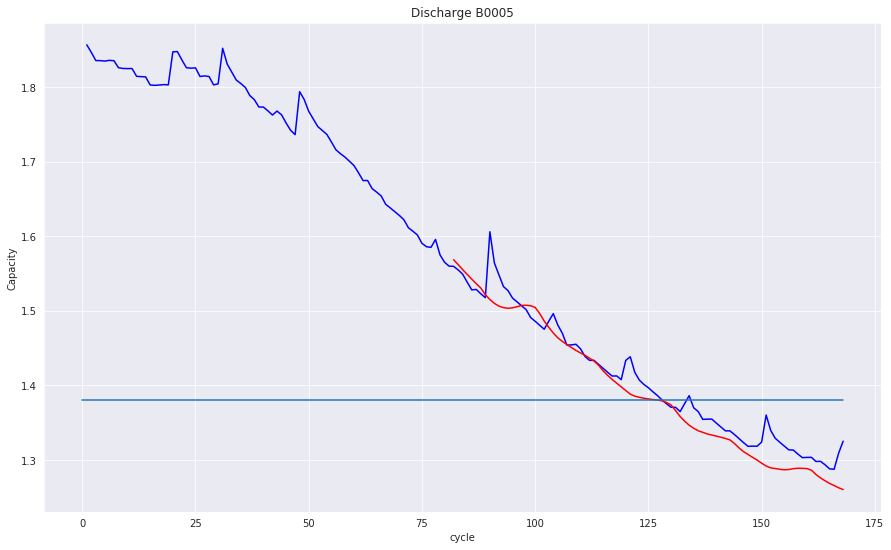

In [18]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = dis_H.loc[(dis_H['cycle']>=1),['cycle','Capacity']]
plot_per=test.loc[test['cycle']>=82,['cycle','perdiction']]
sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(plot_df['cycle'], plot_df['Capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['perdiction'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

RULeror=1 Cycle(s)